<a href="https://colab.research.google.com/github/ARNAB01-DS/CSE475/blob/main/Lab/475_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load dataset

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

columns = [
    "class","cap-shape","cap-surface","cap-color","bruises","odor",
    "gill-attachment","gill-spacing","gill-size","gill-color",
    "stalk-shape","stalk-root","stalk-surface-above-ring",
    "stalk-surface-below-ring","stalk-color-above-ring",
    "stalk-color-below-ring","veil-type","veil-color","ring-number",
    "ring-type","spore-print-color","population","habitat"
]

df = pd.read_csv(url, header=None, names=columns)
df.replace("?", np.nan, inplace=True)

df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Dataset overview

In [ ]:
print("Shape:", df.shape)
df.info()

Shape: (8124, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-

Target distribution

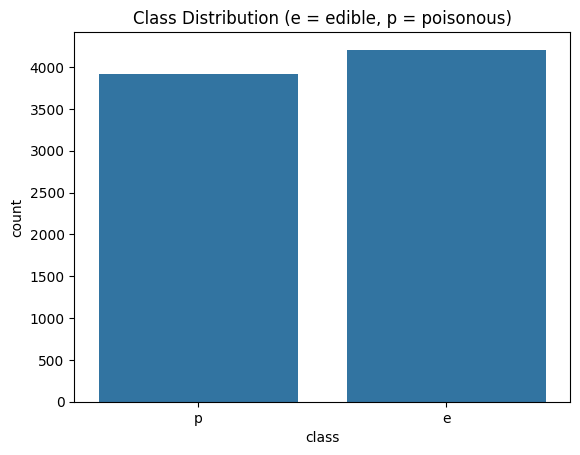

In [ ]:
sns.countplot(x="class", data=df)
plt.title("Class Distribution (e = edible, p = poisonous)")
plt.show()

Missing values

In [ ]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


Preprocessing

In [ ]:
X = df.drop("class", axis=1)
y = df["class"].map({"e": 0, "p": 1})

categorical_features = X.columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat",
         Pipeline([
             ("imputer", SimpleImputer(strategy="most_frequent")),
             ("encoder", OneHotEncoder(handle_unknown="ignore"))
         ]),
         categorical_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Decision Tree Classification

In [ ]:
dt_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Random Forest – Accuracy vs n_estimators

In [ ]:
n_estimators_list = [1, 50, 100, 150, 200, 250]
rf_accuracies = []

for n in n_estimators_list:
    rf_model = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(
            n_estimators=n,
            random_state=42,
            n_jobs=-1
        ))
    ])

    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_rf)
    rf_accuracies.append(acc)

    print(f"Random Forest (n_estimators={n}) Accuracy: {acc}")


Random Forest (n_estimators=1) Accuracy: 1.0
Random Forest (n_estimators=50) Accuracy: 1.0
Random Forest (n_estimators=100) Accuracy: 1.0
Random Forest (n_estimators=150) Accuracy: 1.0
Random Forest (n_estimators=200) Accuracy: 1.0
Random Forest (n_estimators=250) Accuracy: 1.0


Plot accuracy

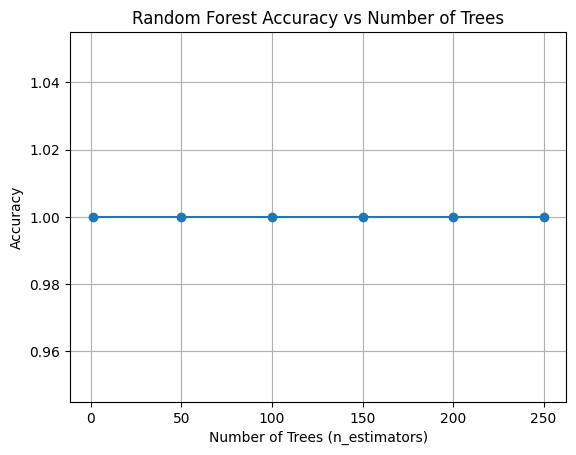

In [ ]:
plt.plot(n_estimators_list, rf_accuracies, marker="o")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Number of Trees")
plt.grid(True)
plt.show()

Best Random Forest Model

In [ ]:
best_n = n_estimators_list[np.argmax(rf_accuracies)]
best_accuracy = max(rf_accuracies)

print("Best n_estimators:", best_n)
print("Best Random Forest Accuracy:", best_accuracy)

Best n_estimators: 1
Best Random Forest Accuracy: 1.0


Comparison

In [ ]:
print("Decision Tree Accuracy:", dt_accuracy)
print("Best Random Forest Accuracy:", best_accuracy)

Decision Tree Accuracy: 1.0
Best Random Forest Accuracy: 1.0
